<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2010%20-%20Hyperbolic%20Equations/1004_Burger%20Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Burger Equation
#### John S Butler john.s.butler@tudublin.ie   [Course Notes](https://johnsbutler.netlify.com/files/Teaching/Numerical_Analysis_for_Differential_Equations.pdf)    [Github](https://github.com/john-s-butler-dit/Numerical-Analysis-Python)
## Overview
This notebook will implement the Lax-Freidrich numerical method on the the Burger Equation.
## The Burger Differential Equation
Consider the one-dimensional non-linear Burger Equation:
\begin{equation}  \frac{\partial u}{\partial t} +u\frac{\partial u}{\partial x}=0,\end{equation}
with the initial conditions
\begin{equation} u(x,0)=1-\cos(x), \ \ 0 \leq x \leq 2\pi. \end{equation}
and wrap around boundary conditions.

This notebook will implement the Lax-Friedrich method to appoximate the solution of the Burger Equation.
The Lax-Fredrich method was designed by Peter Lax (https://en.wikipedia.org/wiki/Peter_Lax) and Kurt Otto Friedrichs (https://en.wikipedia.org/wiki/Kurt_Otto_Friedrichs).


In [1]:
# LIBRARY
# vector manipulation
import numpy as np
# math functions
import math 

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")

## Discete Grid
The region $\Omega$ is discretised into a uniform mesh $\Omega_h$. In the space $x$ direction into $N$ steps giving a stepsize of
\begin{equation} h=\frac{1-0}{N},\end{equation}
resulting in 
\begin{equation}x[i]=0+ih, \ \ \  i=0,1,...,N,\end{equation}
and into $N_t$ steps in the time $t$ direction giving a stepsize of 
\begin{equation} k=\frac{1-0}{N_t}\end{equation}
resulting in 
\begin{equation}t[i]=0+ik, \ \ \ k=0,...,K.\end{equation}
The Figure below shows the discrete grid points for $N=10$ and $Nt=100$,  the known boundary conditions (green), initial conditions (blue) and the unknown values (red) of the Heat Equation.

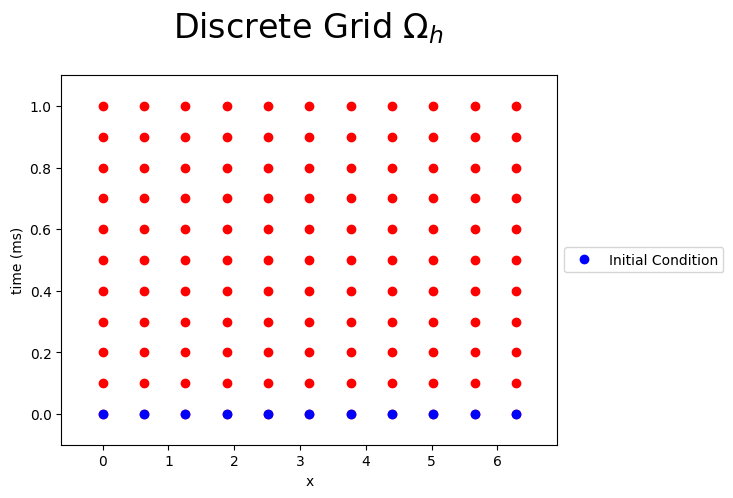

In [2]:
N=10
Nt=10
h=2*np.pi/N
k=1/Nt
r=k/(h*h)
time_steps=10
time=np.arange(0,(time_steps+.5)*k,k)
x=np.arange(0,2*np.pi+h/2,h)


X, Y = np.meshgrid(x, time)

fig = plt.figure()
plt.plot(X,Y,'ro');
plt.plot(x,0*x,'bo',label='Initial Condition');
plt.xlim((-h,2*np.pi+h))
plt.ylim((-k,max(time)+k))
plt.xlabel('x')
plt.ylabel('time (ms)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'Discrete Grid $\Omega_h$ ',fontsize=24,y=1.08)
plt.show();

## Initial Conditions

The discrete initial conditions is,
\begin{equation} w[0,j]=1-\cos(x[j]), \ \ 0 \leq x[j] \leq \pi, \end{equation}
The Figure below plots values of $w[0,j]$ for the inital (blue) conditions for $t[0]=0.$

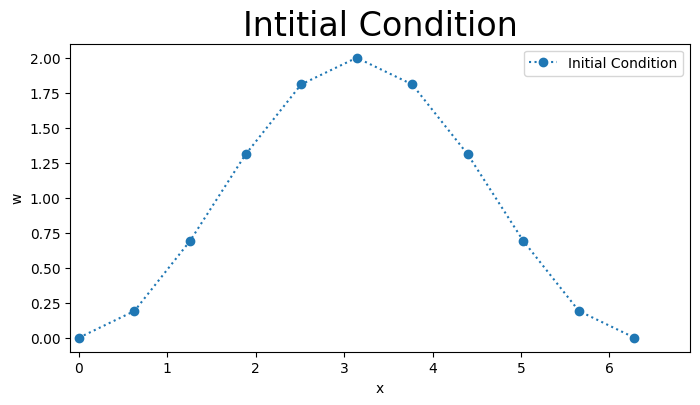

In [3]:
w=np.zeros((time_steps+1,N+1))
b=np.zeros(N-1)
# Initial Condition
for j in range (0,N+1):
    w[0,j]=1-np.cos(x[j])
    

fig = plt.figure(figsize=(8,4))
plt.plot(x,w[0,:],'o:',label='Initial Condition')
plt.xlim([-0.1,max(x)+h])
plt.title('Intitial Condition',fontsize=24)
plt.xlabel('x')
plt.ylabel('w')
plt.legend(loc='best')
plt.show()
ipos = np.zeros(N+1)
ineg = np.zeros(N+1)
for i in range(0,N+1):
   ipos[i] = i+1
   ineg[i] = i-1

ipos[N] = 0
ineg[0] = N


## Lax-Friedrichs Method
The Lax-Friedrichs Method of the Burger Equation is,
\begin{equation}
\frac{w_{ij+1}-\frac{w_{ij+1}+w_{ij-1}}{2}}{k}+aw_{ij}\big(\frac{w_{i+1j}-w_{i-1j}}{2h}\big)=0.
\end{equation}
Rearranging the equation we get
\begin{equation}
w_{ij+1}=\frac{w_{ij+1}+w_{ij-1}}{2}-w_{ij}\frac{\lambda}{2} a(w_{i+1j}-w_{i-1j}),
\end{equation}
for $i=0,...10$ where $\lambda=\frac{k}{h}$.

This gives the formula for the unknown term $w_{ij+1}$ at the $(ij+1)$ mesh points
in terms of $x[i]$ along the jth time row.

In [4]:
lamba=k/h
for j in range(0,time_steps):
    for i in range (0,N+1):
        w[j+1,i]=(w[j,int(ipos[i])]+w[j,int(ineg[i])])/2+lamba*w[j,i]/2*(-(w[j,int(ipos[i])]-w[j,int(ineg[i])]))
        

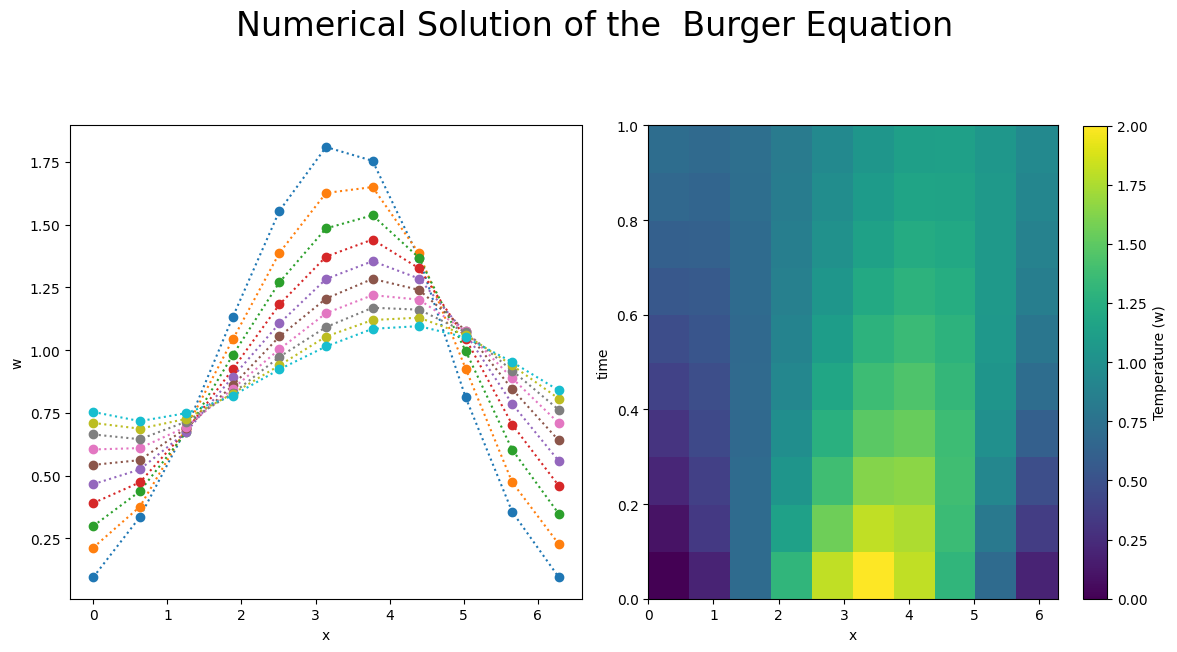

In [5]:
fig = plt.figure(figsize=(12,6))

plt.subplot(121)
for j in range (1,time_steps+1):
    plt.plot(x,w[j,:],'o:')
plt.xlabel('x')
plt.ylabel('w')

plt.subplot(122)
X, T = np.meshgrid(x, time)
z_min, z_max = np.abs(w).min(), np.abs(w).max()


plt.pcolormesh( X,T, w, vmin=z_min, vmax=z_max)


#plt.imshow(w, aspect='auto')
plt.xlabel('x')
plt.ylabel('time')
clb=plt.colorbar()
clb.set_label('Temperature (w)')
plt.suptitle('Numerical Solution of the  Burger Equation'%(np.round(r,3)),fontsize=24,y=1.08)
fig.tight_layout()
plt.show()